## Kriteria 1: Analisis Data dan EDA (Exploratory Data Analysis)

✅ Dataset berhasil dimuat.

--- Analisis Dasar ---

1. Lima baris pertama data (head):


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39



2. Informasi ringkas dataset (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null  

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



4. Matriks Korelasi:


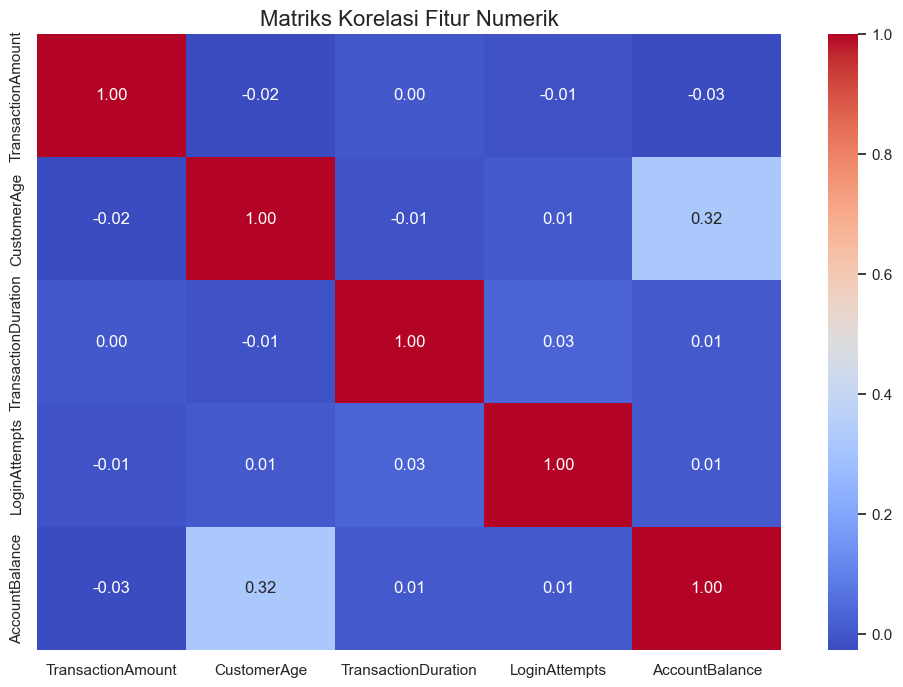


5. Histogram dan Count Plot untuk Setiap Fitur:


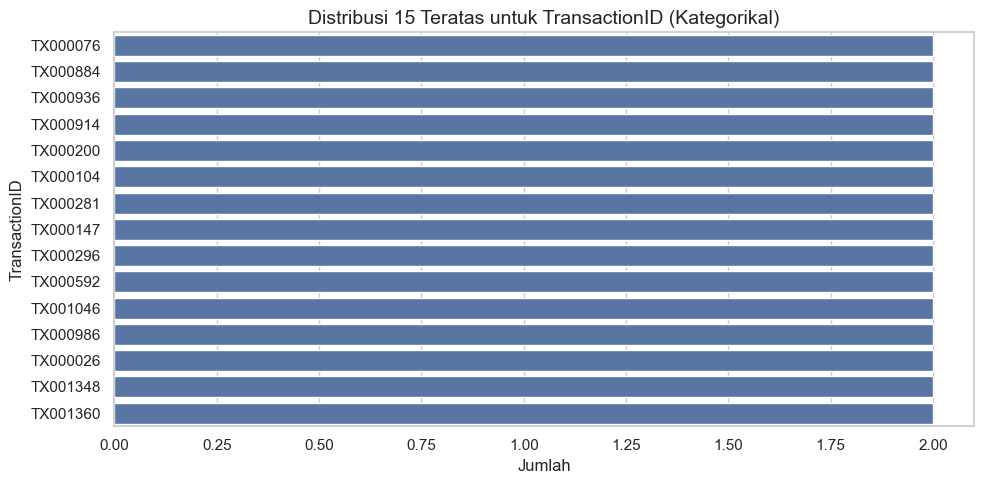

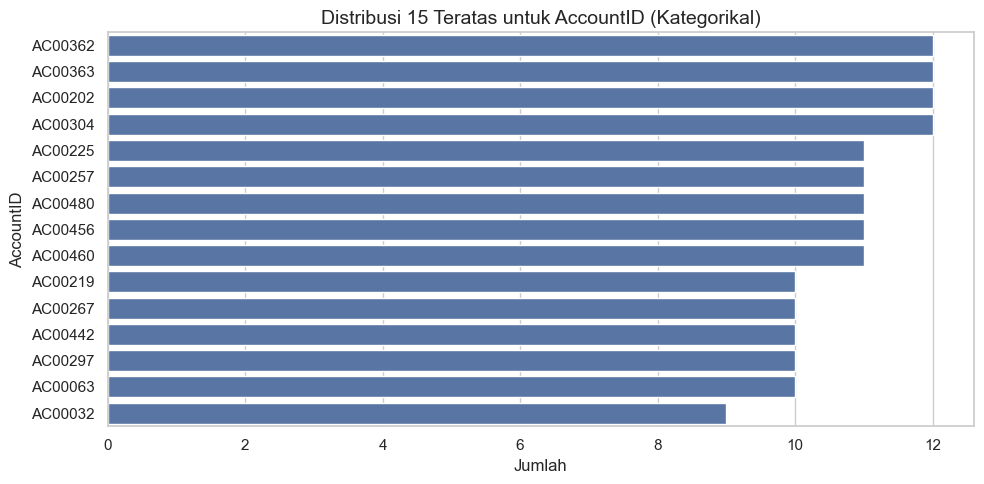

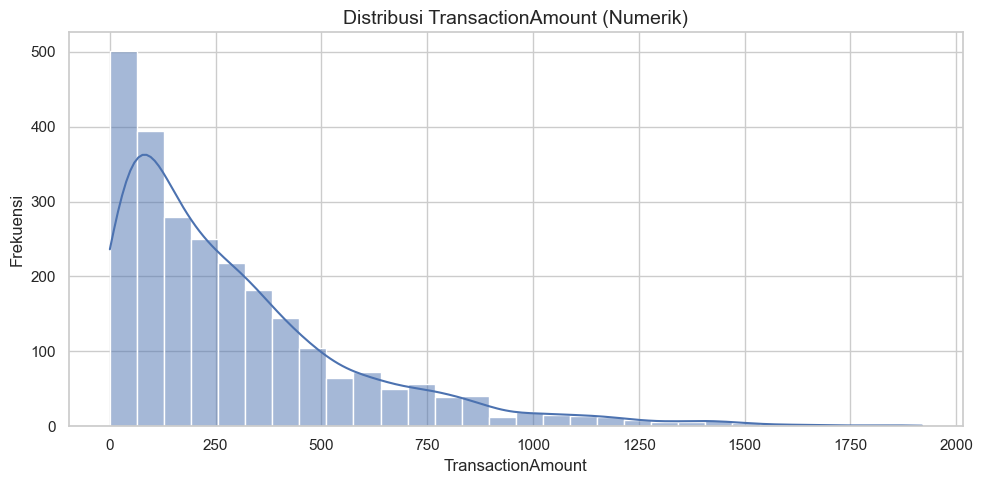

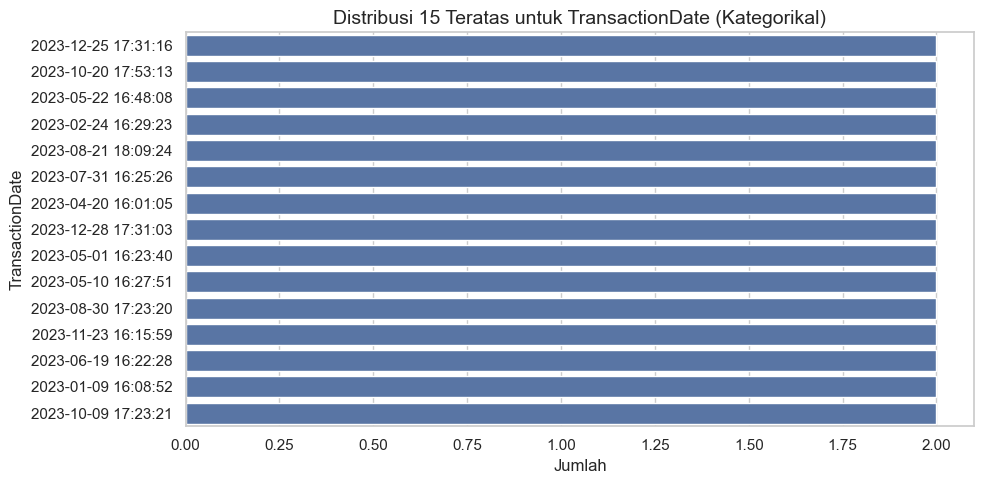

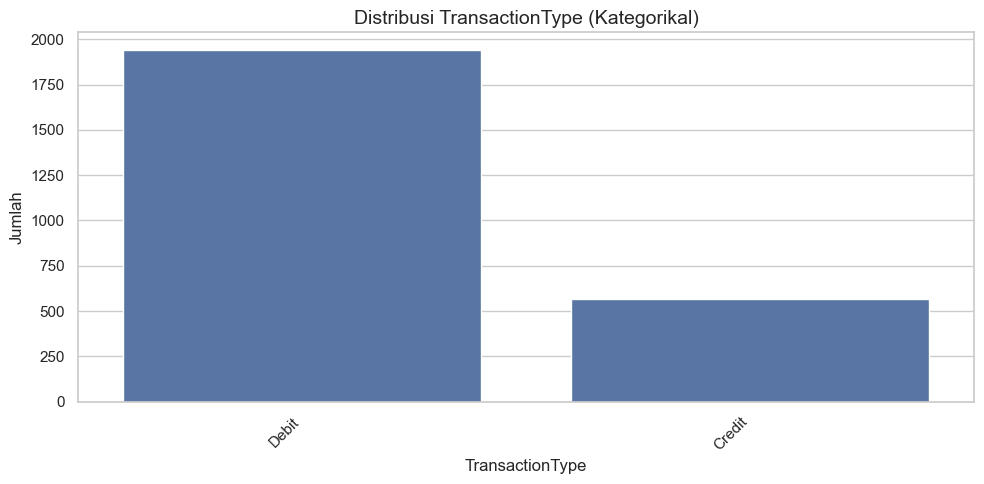

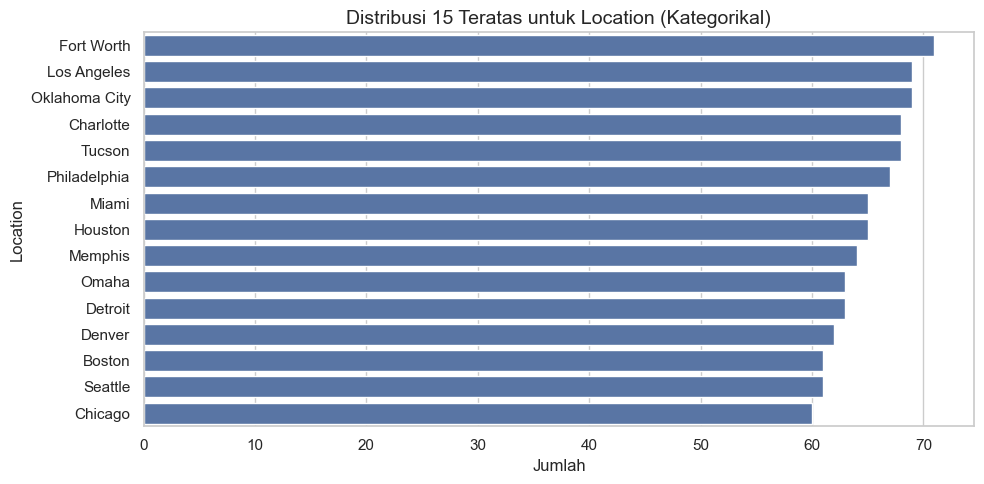

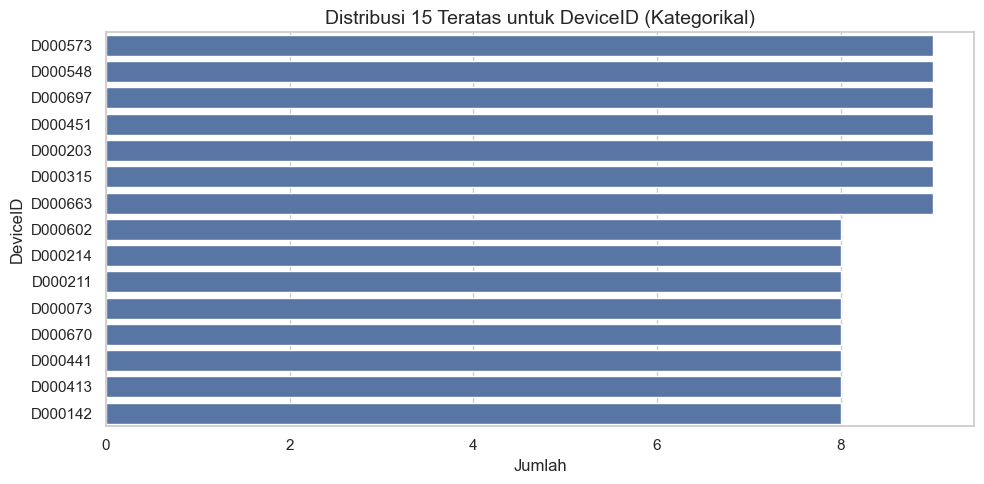

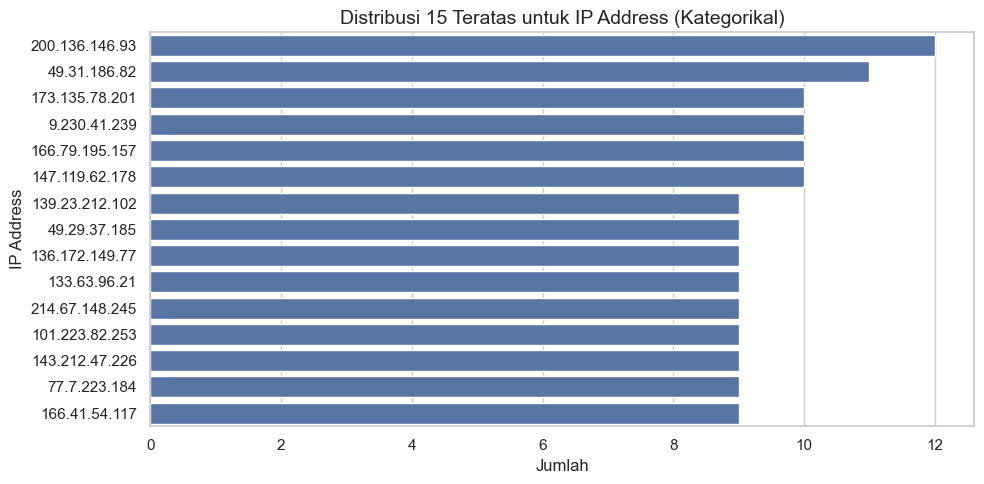

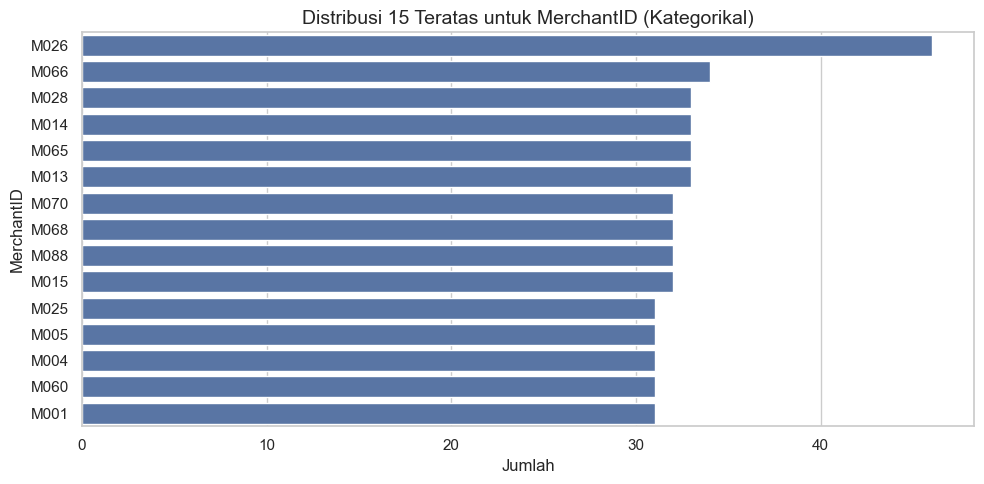

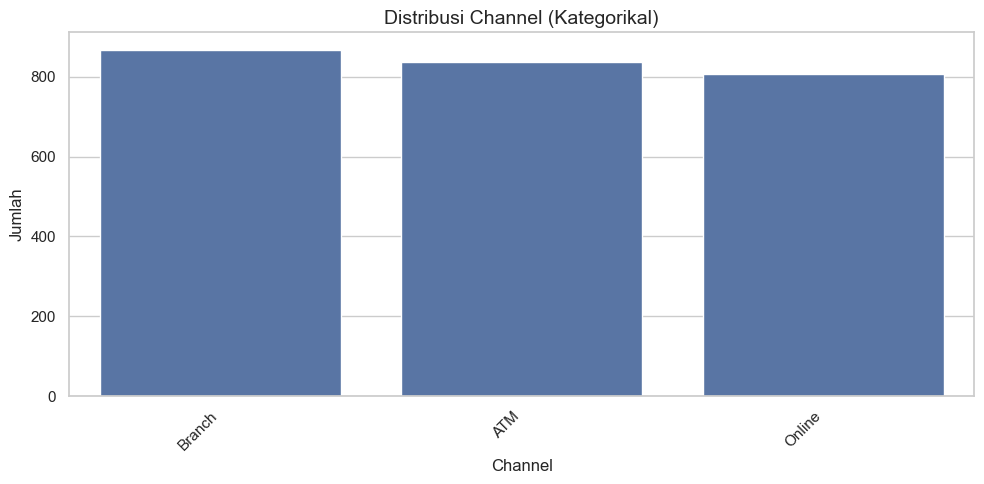

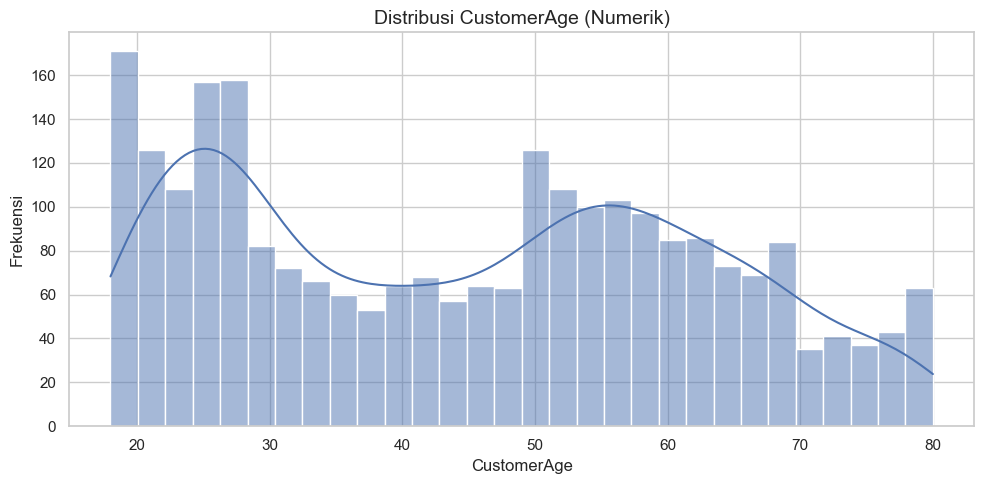

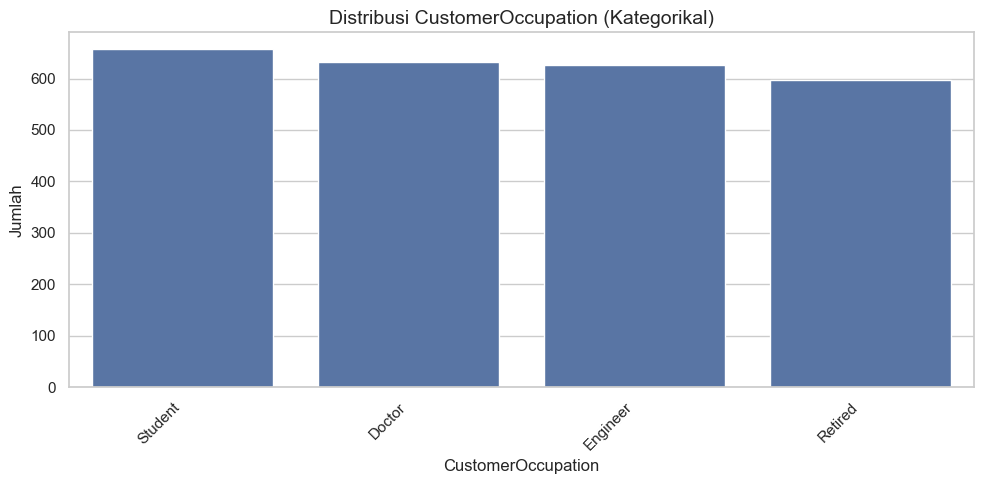

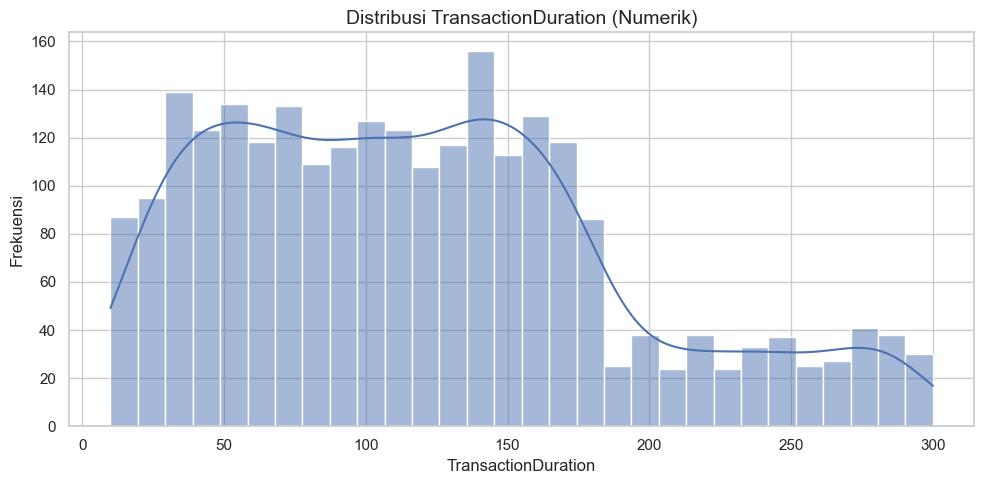

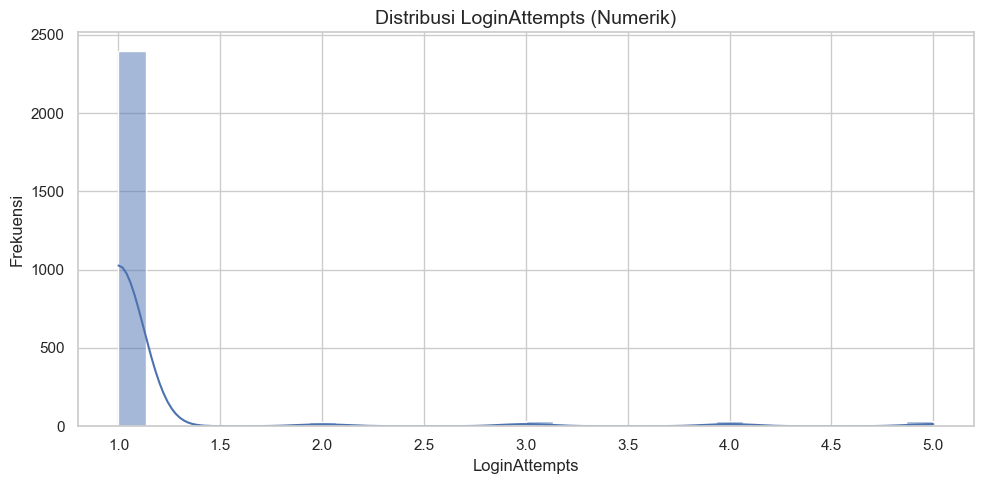

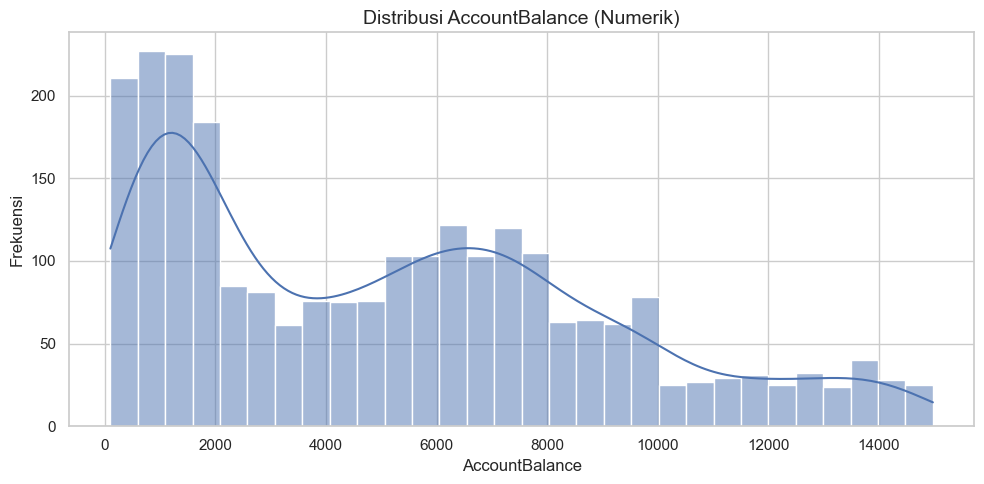

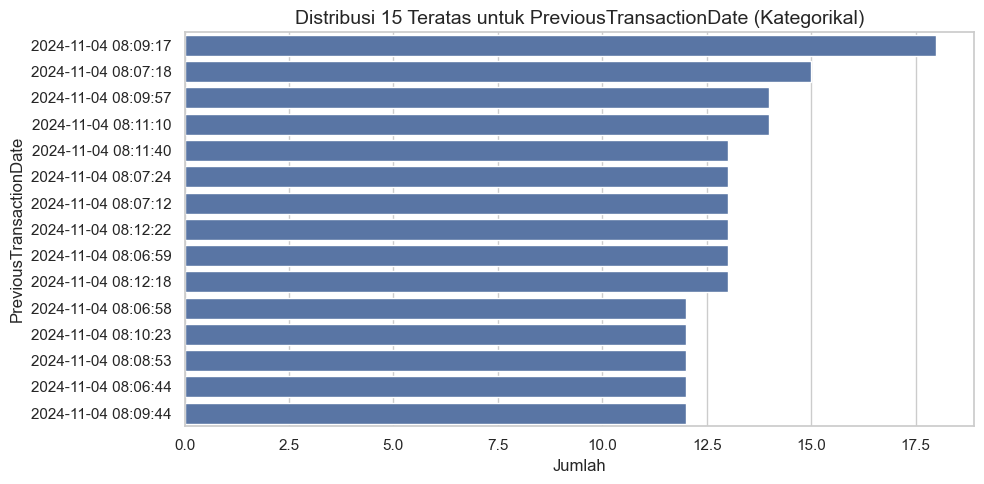

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Memuat dataset
try:
    df = pd.read_csv('bank_transactions_data_edited.csv')
    print("✅ Dataset berhasil dimuat.")
except FileNotFoundError:
    print("❌ File tidak ditemukan. Mohon pastikan nama file sudah benar dan berada di direktori yang sama dengan notebook Anda.")
    df = None

if df is not None:
    print("\n--- Analisis Dasar ---")
    print("\n1. Lima baris pertama data (head):")
    display(df.head())

    print("\n2. Informasi ringkas dataset (info):")
    df.info()

    print("\n3. Statistik deskriptif untuk kolom numerik (describe):")
    display(df.describe())

    # 4. Matriks Korelasi
    print("\n4. Matriks Korelasi:")
    numeric_cols = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
    plt.show()

    # 5. Visualisasi Distribusi untuk Semua Kolom
    print("\n5. Histogram dan Count Plot untuk Setiap Fitur:")
    for column in df.columns:
        plt.figure(figsize=(10, 5))
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(df[column], kde=True, bins=30)
            plt.title(f'Distribusi {column} (Numerik)', fontsize=14)
            plt.xlabel(column)
            plt.ylabel('Frekuensi')
        else:
            if df[column].nunique() > 15:
                top_15 = df[column].value_counts().nlargest(15).index
                sns.countplot(y=column, data=df[df[column].isin(top_15)], order=top_15)
                plt.title(f'Distribusi 15 Teratas untuk {column} (Kategorikal)', fontsize=14)
                plt.xlabel('Jumlah')
                plt.ylabel(column)
            else:
                sns.countplot(x=column, data=df, order=df[column].value_counts().index)
                plt.title(f'Distribusi {column} (Kategorikal)', fontsize=14)
                plt.xlabel(column)
                plt.ylabel('Jumlah')
                plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Kriteria 2: Pembersihan & Pra-Pemrosesan Data

In [6]:
print("Memulai Kriteria 2: Pembersihan dan Pra Pemrosesan Data")

# Salin dataframe asli agar data mentah tetap aman
df_processed = df.copy()

# 1. Drop kolom ID yang tidak relevan
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IPAddress', 'MerchantID']
cols_to_drop = [col for col in id_columns if col in df_processed.columns]
if cols_to_drop:
    df_processed = df_processed.drop(columns=cols_to_drop)
    print(f"✅ Kolom ID yang dihapus: {cols_to_drop}")
else:
    print("Tidak ada kolom ID yang dihapus.")

# 2. Mengecek dan menangani data hilang & duplikat
print(f"\nJumlah data hilang sebelum dibersihkan:\n{df_processed.isnull().sum()}\n")
if df_processed.isnull().sum().sum() > 0:
    df_processed = df_processed.dropna()
    print("✅ Data hilang (NaN) sudah ditangani dengan metode dropna().")
else:
    print("Tidak ada data hilang.")

print(f"\nJumlah data duplikat sebelum dibersihkan: {df_processed.duplicated().sum()}")
if df_processed.duplicated().sum() > 0:
    df_processed = df_processed.drop_duplicates()
    print("✅ Data duplikat sudah dihapus.")
else:
    print("Tidak ada data duplikat.")

# 3. Menangani Outlier pada 'TransactionAmount' menggunakan metode IQR
if 'TransactionAmount' in df_processed.columns:
    print("\nMenangani outliers pada 'TransactionAmount'...")
    Q1 = df_processed['TransactionAmount'].quantile(0.25)
    Q3 = df_processed['TransactionAmount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((df_processed['TransactionAmount'] < lower_bound) | (df_processed['TransactionAmount'] > upper_bound)).sum()
    print(f"Ditemukan {outliers_count} outliers berdasarkan IQR.")
    df_processed = df_processed[(df_processed['TransactionAmount'] >= lower_bound) & (df_processed['TransactionAmount'] <= upper_bound)]
    print("✅ Outliers sudah dihapus.")
else:
    print("Kolom 'TransactionAmount' tidak ditemukan, skip outlier removal.")

# 4. Binning pada fitur 'Age'
if 'Age' in df_processed.columns:
    print("\nMelakukan binning pada fitur 'Age'...")
    age_bins = [0, 25, 40, 60, 100]
    age_labels = ['Muda', 'Dewasa Muda', 'Dewasa', 'Senior']
    df_processed['AgeGroup'] = pd.cut(df_processed['Age'], bins=age_bins, labels=age_labels, right=False)
    df_processed = df_processed.drop(columns=['Age'])
    print("✅ Fitur 'Age' sudah di-binning menjadi 'AgeGroup'.")
else:
    print("Kolom 'Age' tidak ditemukan, skip binning.")

# 5. Feature Encoding (Kategorikal) dan Scaling (Numerik)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nKolom Numerik untuk Scaling: {numerical_cols}")
print(f"Kolom Kategorikal untuk Encoding: {categorical_cols}")

df_inverse = df_processed.copy()
label_encoders = {}
if categorical_cols:
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
    print("\n✅ Semua kolom kategorikal sudah di-encode.")
else:
    print("Tidak ada kolom kategorikal untuk di-encode.")

if numerical_cols:
    scaler = MinMaxScaler()
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
    print("✅ Semua kolom numerik sudah di-scale menggunakan MinMaxScaler.")
else:
    print("Tidak ada kolom numerik untuk di-scale.")

print("\n--- Pra-pemrosesan Selesai! ---")
display(df_processed.head())

Memulai Kriteria 2: Pembersihan dan Pra Pemrosesan Data
✅ Kolom ID yang dihapus: ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID']

Jumlah data hilang sebelum dibersihkan:
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
IP Address                 20
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

✅ Data hilang (NaN) sudah ditangani dengan metode dropna().

Jumlah data duplikat sebelum dibersihkan: 22
✅ Data duplikat sudah dihapus.

Menangani outliers pada 'TransactionAmount'...
Ditemukan 100 outliers berdasarkan IQR.
✅ Outliers sudah dihapus.
Kolom 'Age' tidak ditemukan, skip binning.

Kolom Numerik untuk Scaling: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom Kategorikal untuk Enco

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.015317,591,1,36,185,0,0.838710,0,0.244828,0.0,0.336790,105
1,0.416400,1031,1,15,81,0,0.806452,0,0.451724,0.0,0.918049,192
2,0.139579,1098,1,23,339,2,0.016129,3,0.158621,0.0,0.068578,41
3,0.204047,715,1,33,298,2,0.129032,3,0.051724,0.0,0.569170,163
5,0.101769,550,1,28,59,0,0.000000,3,0.558621,0.0,0.045677,13


## Kriteria 3: Membangun Model Clustering (K-Means & PCA)


Memulai Kriteria 3: Membangun Model Clustering

1. Menjalankan Elbow Method untuk menemukan k optimal...


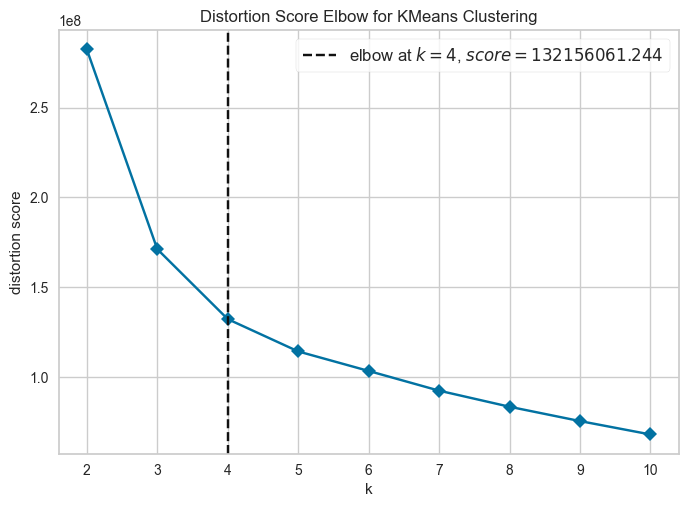

✅ Jumlah cluster optimal (k) yang disarankan adalah: 4

2. Membangun model K-Means dengan k=4...
✅ Model K-Means berhasil dilatih.
   - Silhouette Score: 0.372
✅ Model K-Means utama telah disimpan sebagai 'model_clustering.pkl'.

3. Membangun model pembanding dengan PCA...
✅ Model K-Means pada data PCA berhasil dilatih.
✅ Model K-Means PCA telah disimpan sebagai 'PCA_model_clustering.h5'.

4. Visualisasi hasil clustering...


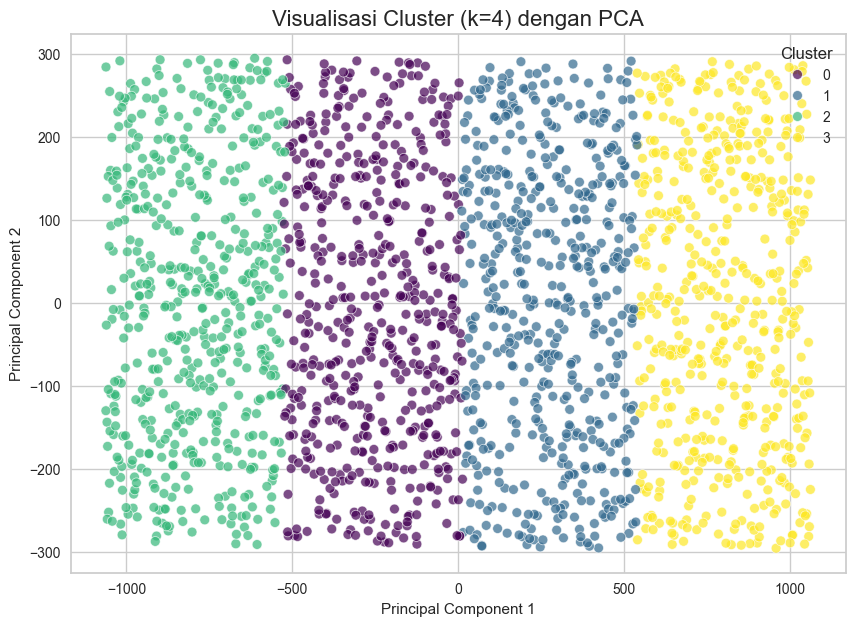


--- Pembangunan Model Clustering Selesai! ---


In [7]:
try:
    from yellowbrick.cluster import KElbowVisualizer
except ImportError:
    print("❌ Library yellowbrick belum terinstal. Silakan install dengan 'pip install yellowbrick'.")
    raise
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

print("\nMemulai Kriteria 3: Membangun Model Clustering")

if df_processed is None or df_processed.empty:
    raise ValueError("Data untuk clustering kosong. Pastikan proses pra-pemrosesan berhasil.")

# 1. Menentukan Jumlah Cluster Optimal dengan Elbow Method
print("\n1. Menjalankan Elbow Method untuk menemukan k optimal...")
model_elbow = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model_elbow, k=(2,11), metric='distortion', timings=False)
visualizer.fit(df_processed)
visualizer.show()
optimal_k = visualizer.elbow_value_
if optimal_k is None:
    print("❌ Elbow tidak ditemukan, gunakan k=3 sebagai default.")
    optimal_k = 3
print(f"✅ Jumlah cluster optimal (k) yang disarankan adalah: {optimal_k}")

# 2. Membangun Model K-Means dengan k optimal
print(f"\n2. Membangun model K-Means dengan k={optimal_k}...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_processed)
print("✅ Model K-Means berhasil dilatih.")

# Menghitung dan menampilkan Silhouette Score
score = silhouette_score(df_processed, kmeans.labels_)
print(f"   - Silhouette Score: {score:.3f}")

# Menyimpan model clustering utama
joblib.dump(kmeans, 'model_clustering.pkl')
print("✅ Model K-Means utama telah disimpan sebagai 'model_clustering.pkl'.")

# 3. Membangun Model dengan PCA sebagai perbandingan
print("\n3. Membangun model pembanding dengan PCA...")
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_processed)
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca.fit(df_pca)
print("✅ Model K-Means pada data PCA berhasil dilatih.")
joblib.dump(kmeans_pca, 'PCA_model_clustering.h5')
print("✅ Model K-Means PCA telah disimpan sebagai 'PCA_model_clustering.h5'.")

# 4. Visualisasi Hasil Clustering
print("\n4. Visualisasi hasil clustering...")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans.labels_, palette='viridis', s=50, alpha=0.7)
plt.title(f'Visualisasi Cluster (k={optimal_k}) dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

print("\n--- Pembangunan Model Clustering Selesai! ---")

## Kriteria 4: Interpretasi Hasil Clustering

In [8]:
print("\nMemulai Kriteria 4: Interpretasi Hasil Clustering")

# 1. Mengembalikan data ke bentuk semula (inverse transform)
print("\n1. Mengembalikan data ke skala dan label asli (inverse transform)...")
df_interpreted = df_inverse.copy()
try:
    if numerical_cols:
        num_cols_exist = [col for col in numerical_cols if col in df_processed.columns]
        if num_cols_exist:
            df_interpreted[num_cols_exist] = scaler.inverse_transform(df_processed[num_cols_exist])
    if categorical_cols:
        for col in categorical_cols:
            if col in df_processed.columns and col in label_encoders:
                df_interpreted[col] = label_encoders[col].inverse_transform(df_processed[col])
    print("✅ Data berhasil di-inverse.")
except Exception as e:
    print(f"❌ Error inverse transform: {e}")

# 2. Integrasi hasil cluster
print("\n2. Menambahkan label cluster ke data yang sudah di-inverse...")
try:
    if hasattr(kmeans, 'labels_') and len(kmeans.labels_) == len(df_interpreted):
        df_interpreted['Target'] = kmeans.labels_
        print("✅ Kolom 'Target' berhasil ditambahkan.")
    else:
        print("❌ Gagal menambahkan label cluster. Panjang label tidak sesuai.")
except Exception as e:
    print(f"❌ Error menambahkan label cluster: {e}")

# 3. Analisis deskriptif setiap cluster
print("\n3. Analisis deskriptif untuk setiap cluster:")
def safe_mode(x):
    try:
        mode_val = x.mode(dropna=True)
        return mode_val.iloc[0] if not mode_val.empty else None
    except Exception:
        return None
agg_functions_numeric = {col: ['mean', 'min', 'max'] for col in numerical_cols if col in df_interpreted.columns}
agg_functions_categorical = {col: safe_mode for col in categorical_cols if col in df_interpreted.columns}
agg_functions = {**agg_functions_numeric, **agg_functions_categorical}
try:
    if 'Target' in df_interpreted.columns and len(df_interpreted) > 0:
        cluster_summary = df_interpreted.groupby('Target').agg(agg_functions)
        display(cluster_summary)
    else:
        print("❌ Kolom 'Target' tidak ditemukan pada data interpretasi atau data kosong.")
except Exception as e:
    print(f"❌ Error analisis deskriptif cluster: {e}")

print("\n--- Interpretasi Karakteristik Cluster ---")
if 'Target' in df_interpreted.columns and len(df_interpreted) > 0:
    for i in sorted(df_interpreted['Target'].unique()):
        try:
            summary = cluster_summary.loc[i]
            # MultiIndex: summary is a Series with MultiIndex if numeric, else single index
            def get_val(idx_tuple):
                try:
                    return summary[idx_tuple]
                except Exception:
                    return None
            print(f"\nCluster {i}:")
            val = get_val(('TransactionAmount', 'mean'))
            if val is not None:
                print(f"  - Rata-rata Jumlah Transaksi: ${val:.2f}")
            val_trx = get_val(('TransactionType', 'safe_mode'))
            val_loc = get_val(('Location', 'safe_mode'))
            if val_trx is not None and val_loc is not None:
                loc_str = val_loc.split(',')[0] if isinstance(val_loc, str) else val_loc
                print(f"  - Jenis Transaksi Dominan: {val_trx} oleh nasabah dari {loc_str}")
            val_pay = get_val(('PaymentMethod', 'safe_mode'))
            val_merch = get_val(('MerchantCategory', 'safe_mode'))
            if val_pay is not None and val_merch is not None:
                print(f"  - Metode Pembayaran Favorit: {val_pay} pada kategori {val_merch}")
            val_age = get_val(('AgeGroup', 'safe_mode'))
            if val_age is not None:
                print(f"  - Kelompok Usia Dominan: {val_age}")
        except Exception as e:
            print(f"  - Error interpretasi cluster {i}: {e}")

# 4. Simpan hasil interpretasi
print("\n4. Menyimpan hasil interpretasi ke file CSV...")
try:
    df_interpreted.to_csv('data_clustering_inverse.csv', index=False)
    print("✅ Data hasil clustering (inverse) telah disimpan sebagai 'data_clustering_inverse.csv'")
except Exception as e:
    print(f"❌ Gagal menyimpan file: {e}")

print("\n--- Interpretasi Selesai! ---")


Memulai Kriteria 4: Interpretasi Hasil Clustering

1. Mengembalikan data ke skala dan label asli (inverse transform)...
✅ Data berhasil di-inverse.

2. Menambahkan label cluster ke data yang sudah di-inverse...
✅ Kolom 'Target' berhasil ditambahkan.

3. Analisis deskriptif untuk setiap cluster:


TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             251.029104  1.41  903.19   45.076493  18.0  80.0   
1             267.657685  0.32  890.24   45.011385  18.0  80.0   
2             260.211354  0.86  877.81   43.330241  18.0  80.0   
3             242.461527  0.26  896.79   44.961832  18.0  80.0   

       TransactionDuration              LoginAttempts  ... AccountBalance  \
                      mean   min    max          mean  ...           mean   
Target                                                 ...                  
0               118.876866  10.0  298.0      1.104478  ...    5086.352854   
1               121.485769  10.0  299.0      1.104364  ...    4992.199848   
2               116.729128  10.0  299.0      1.152134  ...    5112.620612   
3               121.482824  10.0  300.0      1.124046  ...    5340.151508   

                              TransactionDate TransactionType  Location  \
           min       max            safe_mode       safe_mode safe_mode   
Target                                                                    
0       106.86  14904.90  2023-04-03 16:07:53           Debit  New York   
1       105.01  14935.50  2023-07-06 16:47:00           Debit   Houston   
2       102.20  14942.78  2023-01-02 16:00:06           Debit    Boston   
3       164.12  14977.99  2023-10-09 16:01:25           Debit      Mesa   

            IP Address   Channel CustomerOccupation PreviousTransactionDate  
             safe_mode safe_mode          safe_mode               safe_mode  
Target                                                                       
0       200.136.146.93    Branch            Student     2024-11-04 08:07:18  
1       101.223.82.253       ATM            Student     2024-11-04 08:08:12  
2       139.23.212.102    Branch             Doctor     2024-11-04 08:10:23  
3        49.20.211.229    Branch             Doctor     2024-11-04 08:07:50  

[4 rows x 22 columns]


--- Interpretasi Karakteristik Cluster ---

Cluster 0:
  - Rata-rata Jumlah Transaksi: $251.03
  - Jenis Transaksi Dominan: Debit oleh nasabah dari New York

Cluster 1:
  - Rata-rata Jumlah Transaksi: $267.66
  - Jenis Transaksi Dominan: Debit oleh nasabah dari Houston

Cluster 2:
  - Rata-rata Jumlah Transaksi: $260.21
  - Jenis Transaksi Dominan: Debit oleh nasabah dari Boston

Cluster 3:
  - Rata-rata Jumlah Transaksi: $242.46
  - Jenis Transaksi Dominan: Debit oleh nasabah dari Mesa

4. Menyimpan hasil interpretasi ke file CSV...
✅ Data hasil clustering (inverse) telah disimpan sebagai 'data_clustering_inverse.csv'

--- Interpretasi Selesai! ---


## Kriteria 5: Membangun Model Klasifikasi

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

print("\nMemulai Kriteria 5: Membangun Model Klasifikasi")

# 1. Persiapan Data untuk Klasifikasi
try:
    if hasattr(kmeans, 'labels_') and len(kmeans.labels_) == len(df_processed):
        X = df_processed.drop('Target', axis=1, errors='ignore').copy()
        X['Target'] = kmeans.labels_
        y = X.pop('Target')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        print(f"✅ Data telah dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")
    else:
        raise ValueError("Label cluster tidak sesuai jumlah data. Pastikan proses clustering berhasil.")
except Exception as e:
    print(f"❌ Error pada persiapan data klasifikasi: {e}")
    X_train = X_test = y_train = y_test = None

# 2. Melatih dan mengevaluasi beberapa model
if X_train is not None and y_train is not None:
    print("\n2. Melatih dan mengevaluasi beberapa model klasifikasi...")
    models = {
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
    }
    best_model_name = ""
    best_model_score = 0.0
    best_model_instance = None
    for name, model in models.items():
        try:
            print(f"\n--- Melatih {name} ---")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=[f'Cluster {i}' for i in sorted(set(y))])
            print(report)
            f1_avg = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
            if f1_avg > best_model_score:
                best_model_score = f1_avg
                best_model_name = name
                best_model_instance = model
        except Exception as e:
            print(f"❌ Error melatih {name}: {e}")
    try:
        joblib.dump(models["Decision Tree"], 'decision_tree_model.h5')
        print("\n✅ Model Decision Tree telah disimpan sebagai 'decision_tree_model.h5'.")
    except Exception as e:
        print(f"❌ Gagal menyimpan Decision Tree: {e}")
    if best_model_instance is not None:
        try:
            explore_model_filename = f'explore_{best_model_name.replace(" ", "")}_classification.h5'
            joblib.dump(best_model_instance, explore_model_filename)
            print(f"✅ Model eksplorasi terbaik ({best_model_name}) telah disimpan sebagai '{explore_model_filename}'.")
        except Exception as e:
            print(f"❌ Gagal menyimpan model terbaik: {e}")
else:
    print("❌ Data latih/tes tidak tersedia, proses klasifikasi dihentikan.")

# 3. Hyperparameter Tuning pada Model Terbaik
if best_model_instance is not None and best_model_name:
    print(f"\n3. Melakukan Hyperparameter Tuning pada {best_model_name}...")
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    } if best_model_name == "Random Forest" else {}
    if param_grid:
        try:
            grid_search = GridSearchCV(estimator=best_model_instance, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')
            grid_search.fit(X_train, y_train)
            print(f"\nParameter terbaik ditemukan: {grid_search.best_params_}")
            tuned_model = grid_search.best_estimator_
            print("\nLaporan klasifikasi untuk model yang sudah di-tuning:")
            y_pred_tuned = tuned_model.predict(X_test)
            print(classification_report(y_test, y_pred_tuned, target_names=[f'Cluster {i}' for i in sorted(set(y))]))
            joblib.dump(tuned_model, 'tuning_classification.h5')
            print("✅ Model hasil tuning telah disimpan sebagai 'tuning_classification.h5'.")
        except Exception as e:
            print(f"❌ Error tuning model: {e}")
    else:
        print("(Model terbaik bukan Random Forest, tuning dilewati atau sesuaikan param_grid.)")
else:
    print("❌ Tidak ada model terbaik untuk tuning.")

print("\n--- Proyek Selesai! ---")


Memulai Kriteria 5: Membangun Model Klasifikasi
✅ Data telah dibagi menjadi 1700 data latih dan 426 data uji.

2. Melatih dan mengevaluasi beberapa model klasifikasi...

--- Melatih Decision Tree ---
              precision    recall  f1-score   support

   Cluster 0       0.98      1.00      0.99       107
   Cluster 1       1.00      0.99      1.00       106
   Cluster 2       1.00      0.99      1.00       108
   Cluster 3       1.00      1.00      1.00       105

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


--- Melatih Random Forest ---
              precision    recall  f1-score   support

   Cluster 0       0.98      1.00      0.99       107
   Cluster 1       1.00      0.99      1.00       106
   Cluster 2       1.00      0.99      1.00       108
   Cluster 3       1.00      1.00      1.00       105

    accuracy                           1.00       426
   macr